задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

задание 6: Могла ли модель переобучиться? Почему?

задание 7: (опция) Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

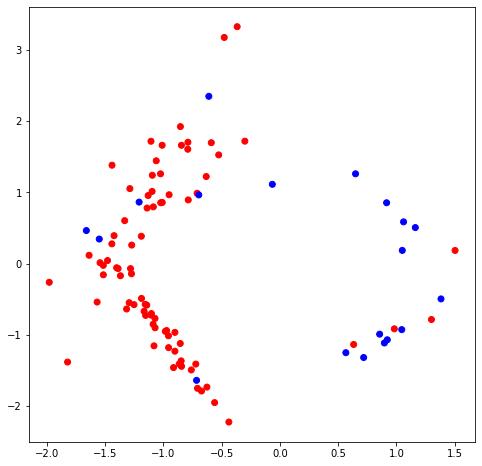

In [2]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100,
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0, 
                                       n_classes=2,
                                       flip_y = 0.2,
                                       weights = [0.833, 0.167],
                                       random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [3]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

In [4]:
# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [5]:
# Транспонируем в строки, так как удобнее работать со строками.
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [6]:
def calc_logloss(W, X, y, eps=1e-6):
    #eps малая ошибка
    n = X.shape[1]
    A = sigmoid(np.dot(W.T, X))
    
    dict_eps ={0: eps, 1: 1 - eps}
    def mp(entry):
        return dict_eps[entry] if entry in dict_eps else entry
    mp = np.vectorize(mp)
    A = mp(A)
                
    logloss = - np.mean(y * np.log(A) + (1.0 - y) * np.log(1.0 - A))
       
    return logloss


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def eval_model(X, y, iterations, alpha=1e-3):

    n = X.shape[1]
    errors = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0], 1)
    
    for i in range(iterations):
        z = np.dot(W.T, X)
        err = calc_logloss(W, X, y)
        W = W - alpha * 1.0 / n * np.dot(X, (sigmoid(z) - y).T) 
        errors.append(err)
                
    return W, errors

In [9]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(W.T.dot(X))
    return y_pred_proba

In [10]:
def calc_pred(W, X, threshold = 0.5):
    y_pred = calc_pred_proba(W,X)[0]
    for i in range(len(y_pred)):
        if y_pred[i] >= threshold:
            y_pred[i] = 1
        else: 
            y_pred[i] = 0
    return y_pred

In [11]:
def error_matrix(y, y_pred):
    TP = ((y_pred == 1) & (y == 1)).sum()
    FP = ((y_pred == 1) & (y == 0)).sum()
    FN = ((y_pred == 0) & (y == 1)).sum()
    TN = ((y_pred == 0) & (y == 0)).sum()
    
    return np.array([[TP, FP], [FN, TN]])

In [12]:
def classification_metric(y, y_pred):
    TP = ((y_pred == 1) & (y == 1)).sum()
    FP = ((y_pred == 1) & (y == 0)).sum()
    FN = ((y_pred == 0) & (y == 1)).sum()
    TN = ((y_pred == 1) & (y == 0)).sum()
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1_score = 2 * precision * recall / (precision + recall)
    
    return precision, recall, F1_score

In [13]:
arguments = {"alpha": [1e-2, 1e-3, 1e-5],
             "iters": [1000, 10000, 100000],
            "lambda_": [1e-2, 1e-4]}

1
Количество итераций: 1000, скорость: 0.01
True
Минимальный logloss = 0.3184709367491455
Итоговый вектор весов W: [[1.74580801]
 [0.02973614]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
2
Количество итераций: 1000, скорость: 0.001
True
Минимальный logloss = 0.4495428961015966
Итоговый вектор весов W: [[ 0.75308976]
 [-0.10141324]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
3
Количество итераций: 1000, скорость: 1e-05
True
Минимальный logloss = 0.5160671131097354
Итоговый вектор весов W: [[ 0.49961779]
 [-0.13783989]]
Точность на обучающей выборке: 88.571
Точность на тестовой выборке: 86.667
4
Количество итераций: 10000, скорость: 0.01
True
Минимальный logloss = 0.3031717509914237
Итоговый вектор весов W: [[2.35373242]
 [0.12419871]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
5
Количество итераций: 10000, скорость: 0.001
True
Минимальный logloss = 0.31846669871114636
Итоговый вектор весов W:

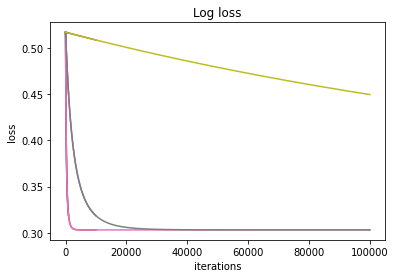

In [14]:
k = 0
for i in range(len(arguments['iters'])):
    for j in range(len(arguments['alpha'])):
        W, errors = eval_model(X_train_tr, y_train_tr, iterations=arguments['iters'][i], alpha = arguments['alpha'][j])
        y_predicted_test = calc_pred(W, X_test_tr)
        y_predicted_train = calc_pred(W, X_train_tr)
              
        # В качестве меры точности возьмем долю правильных ответов
        train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
        test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)
        k += 1
        print(k)
        print(f"Количество итераций: {arguments['iters'][i]}, скорость: {arguments['alpha'][j]}")
        print(f"{errors[-1]==min(errors)}") # Проверяем гипотезу, что последний элемент и есть минимальный, так как логарифмическая функция монотонно убывает.
        print(f"Минимальный logloss = {min(errors)}")
        print(f"Итоговый вектор весов W: {W}")
        print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
        print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
        plt.title('Log loss')
        plt.xlabel('iterations')
        plt.ylabel('loss')
        plt.plot(range(len(errors)), errors)

Чем выше logloss, тем ниже точность обучающего теста. При самой малой скорости alpha = 1e-5 модель обучается медленно, и при 100000 итерациях она все еще стремится к минимальному значению logloss. Это никак не улучшает точность модели, но увеличивает время её выполнения.
Минимальный logloss = 0.303171700 наблюдается при количестве итераций: 100000, alpha = 0.01 (модель 7).

При количестве итераций: 10000, alpha = 0.01 минимальный logloss = 0.303171750. Что практически не отличается от модели 7, поэтому модель под номер 4 можно считать наиболее оптимальной, так как она занимает меньше времени из-за меньшего количества иттераций.


Модель не может переобучится, потому что логарифмическая функция монотонно убывает.

In [15]:
error_matrix(y_train_tr, y_predicted_train)

array([[11,  3],
       [ 4, 52]])

In [16]:
error_matrix(y_test_tr, y_predicted_test)

array([[ 1,  1],
       [ 3, 25]])

In [17]:
precision_test, recall_test, F1_score_test = classification_metric(y_test_tr, y_predicted_test)
print(precision_test, recall_test, F1_score_test)
precision, recall, F1_score = classification_metric(y_train_tr, y_predicted_train)
print(precision, recall, F1_score)

0.5 0.25 0.3333333333333333
0.7857142857142857 0.7333333333333333 0.7586206896551724


In [18]:
def eval_model_l1(X, y, iterations, alpha=1e-3, lambda_=1e-6):

    n = X.shape[1]
    errors = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0], 1)
    
    for i in range(iterations):
        z = np.dot(W.T, X)
        err = calc_logloss(W, X, y)
        W = W - alpha * 1.0 / n * np.dot(X, (sigmoid(z) - y).T) + (lambda_*np.sign(W))
        errors.append(err)
                
    return W, errors

In [19]:
def eval_model_l2(X, y, iterations, alpha=1e-3, lambda_=1e-6):

    n = X.shape[1]
    errors = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0], 1)
    
    for i in range(iterations):
        z = np.dot(W.T, X)
        err = calc_logloss(W, X, y)
        W = W - alpha * 1.0 / n * np.dot(X, (sigmoid(z) - y).T) + (lambda_*W)
        errors.append(err)
                
    return W, errors

In [20]:
k = 0
for i in range(len(arguments['iters'])):
    for j in range(len(arguments['alpha'])):
        for h in range(len(arguments['lambda_'])):
            W, errors = eval_model_l1(X_train_tr, y_train_tr, iterations=arguments['iters'][i], alpha = arguments['alpha'][j])
            y_predicted_test = calc_pred(W, X_test_tr)
            y_predicted_train = calc_pred(W, X_train_tr)
            train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
            test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)
            k += 1
            print(k)
            print(f"Количество итераций: {arguments['iters'][i]}, скорость: {arguments['alpha'][j]}, лямбда: {arguments['lambda_'][h]}")
            print(f"Минимальный logloss = {min(errors)}")
            print(f"Итоговый вектор весов W: {W}")
            print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
            print(f"Точность на тестовой выборке: {test_accuracy:.3f}")


1
Количество итераций: 1000, скорость: 0.01, лямбда: 0.01
Минимальный logloss = 0.31844154683472337
Итоговый вектор весов W: [[1.74633893]
 [0.02983463]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
2
Количество итераций: 1000, скорость: 0.01, лямбда: 0.0001
Минимальный logloss = 0.31844154683472337
Итоговый вектор весов W: [[1.74633893]
 [0.02983463]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
3
Количество итераций: 1000, скорость: 0.001, лямбда: 0.01
Минимальный logloss = 0.449370734909665
Итоговый вектор весов W: [[ 0.75397575]
 [-0.10228261]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
4
Количество итераций: 1000, скорость: 0.001, лямбда: 0.0001
Минимальный logloss = 0.449370734909665
Итоговый вектор весов W: [[ 0.75397575]
 [-0.10228261]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
5
Количество итераций: 1000, скорость: 1e-05, лямбда: 0.01
Минимальный logloss

In [21]:
k = 0
for i in range(len(arguments['iters'])):
    for j in range(len(arguments['alpha'])):
        for h in range(len(arguments['lambda_'])):
            W, errors = eval_model_l2(X_train_tr, y_train_tr, iterations=arguments['iters'][i], alpha = arguments['alpha'][j])
            y_predicted_test = calc_pred(W, X_test_tr)
            y_predicted_train = calc_pred(W, X_train_tr)
            train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
            test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)
            k += 1
            print(k)
            print(f"Количество итераций: {arguments['iters'][i]}, скорость: {arguments['alpha'][j]}, лямбда: {arguments['lambda_'][h]}")
            print(f"Минимальный logloss = {min(errors)}")
            print(f"Итоговый вектор весов W: {W}")
            print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
            print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

1
Количество итераций: 1000, скорость: 0.01, лямбда: 0.01
Минимальный logloss = 0.31842906238720237
Итоговый вектор весов W: [[1.74658039]
 [0.02975802]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
2
Количество итераций: 1000, скорость: 0.01, лямбда: 0.0001
Минимальный logloss = 0.31842906238720237
Итоговый вектор весов W: [[1.74658039]
 [0.02975802]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
3
Количество итераций: 1000, скорость: 0.001, лямбда: 0.01
Минимальный logloss = 0.44941902226750136
Итоговый вектор весов W: [[ 0.75365316]
 [-0.10151586]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
4
Количество итераций: 1000, скорость: 0.001, лямбда: 0.0001
Минимальный logloss = 0.44941902226750136
Итоговый вектор весов W: [[ 0.75365316]
 [-0.10151586]]
Точность на обучающей выборке: 90.000
Точность на тестовой выборке: 86.667
5
Количество итераций: 1000, скорость: 1e-05, лямбда: 0.01
Минимальный log

При применении регуляризации l1 и l2 разница незначительная.